# Chapter 1: Introduction to Data Science and Data Pre-processing 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Data/USA_HOUSING.csv')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
#View all the columns (n):
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
#Find number of observations (m):
df.index

RangeIndex(start=0, stop=5000, step=1)

In [8]:
#Use a column as index
df.set_index('Address', inplace=True)

In [11]:
#To reset index:
df.reset_index(inplace=True)

In [13]:
#Get specific rows and columns:
df.iloc[0:4,0:3]

,Address,Avg. Area Income,Avg. Area House Age
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",79545.458574,5.682861
1,"188 Johnson Views Suite 079\nLake Kathleen, CA...",79248.642455,6.002900
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",61287.067179,5.865890
3,USS Barnett\nFPO AP 44820,63345.240046,7.188236


In [14]:
#To retrieve using labels use loc :
df.loc[0:4, ['Avg. Area Income', 'Avg. Area House Age']]

,Avg. Area Income,Avg. Area House Age
0,79545.458574,5.682861
1,79248.642455,6.002900
2,61287.067179,5.865890
3,63345.240046,7.188236
4,59982.197226,5.040555


In [16]:
#Create a variable to store independent features
#Drop removes the dependent variable
X = df.drop('Price', axis=1)
X.head()

,Address,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",79545.458574,5.682861,7.009188,4.09,23086.800503
1,"188 Johnson Views Suite 079\nLake Kathleen, CA...",79248.642455,6.002900,6.730821,3.09,40173.072174
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",61287.067179,5.865890,8.512727,5.13,36882.159400
3,USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831
4,USNS Raymond\nFPO AE 09386,59982.197226,5.040555,7.839388,4.23,26354.109472


In [17]:
#To print shape of newly created feautre matrix:
X.shape
#5000 is number of observations (m), 6 is the number of features (n) 

(5000, 6)

In [18]:
#Create variable to story target values 
y = df['Price']
y.head(10)

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
5    1.068138e+06
6    1.502056e+06
7    1.573937e+06
8    7.988695e+05
9    1.545155e+06
Name: Price, dtype: float64

In [19]:
y.shape
#One dimensional series will only show # of observations

(5000,)

## Excercise 2: Removing Missing Data

In [20]:
import pandas as pd 

In [21]:
df = pd.read_csv('Data/Banking_Marketing.csv', header=0)

In [23]:
#Print the datatype of each column
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [26]:
#Find missing values for each column:
df.isna().sum()

age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [27]:
#Removing null values (rows)
df = df.dropna()

## Exercise 3: Imputing Missing Data

In [28]:
import pandas as pd
df = pd.read_csv('Data/Banking_Marketing.csv', header=0)

In [29]:
#Impute the numerical data of the age column with its mean
mean_age = df.age.mean()
print(mean_age)

40.023812413525256


In [30]:
#Fill missing data with its mean
df.age.fillna(mean_age, inplace=True)

In [31]:
#Impute the duration columns with median
median_duration = df.duration.median()
print(median_duration)

180.0


In [32]:
#Fill missing data with median
df.duration.fillna(median_duration, inplace=True)

In [35]:
#Impute categoricall data of the contact column with its mode
mode_contact = df.contact.mode()[0]
print(mode_contact)

cellular


In [36]:
#Fill missing data with mode
df.contact.fillna(mode_contact, inplace=True)

In [37]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## Exercise 4: Finding and Removing Outliers in Data

In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sbn

#reading the data into the dataframe into the object data
df = pd.read_csv('Data/german_credit_data.csv', header=0)

<AxesSubplot:xlabel='Age'>

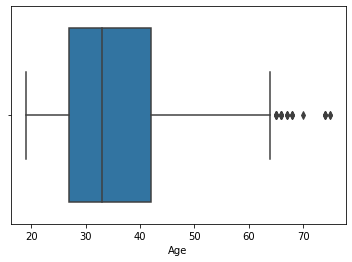

In [43]:
#Create boxplot using seaborn
sbn.boxplot(df['Age'])

In [45]:
#Find the outliers
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1 

#Find lower and upper fences 
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

print(lower_fence, upper_fence)

4.5 64.5


In [47]:
#Find all the data outside the fences
df[(df['Age'] < lower_fence) | (df['Age'] > upper_fence)].head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
75,75,66,male,3,free,little,little,1526,12,car
137,137,66,male,1,own,quite rich,moderate,766,12,radio/TV
163,163,70,male,3,free,little,moderate,7308,10,car
179,179,65,male,2,own,little,little,571,21,car


In [50]:
#To filter out the outliers, simply use the ~ sign
df = df[~((df['Age'] < lower_fence) | (df['Age'] > upper_fence))]
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education


## Exercise 5: Integrating Data 


In [51]:
import pandas as pd 

dataset1 = 'Data/student.csv'
dataset2 = 'Data/mark.csv'

In [52]:
df1 = pd.read_csv(dataset1, header = 0)
df2 = pd.read_csv(dataset2, header = 0)

In [53]:
df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [54]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [55]:
#Merge the two datasets
df = pd.merge(df1, df2, on = 'Student_id')
df.head()

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi


## Exercise 6: Simple Replacement of Categorical Data with a Number

In [56]:
import pandas as pd
import numpy as np


In [71]:
df = pd.read_csv('Data/student.csv', header = 0)

In [72]:
#Find the categorical column and seperate it out in different dataframe
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


In [60]:
#Find distinct unique values 
df_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [62]:
#Find the frequency of each value 
df_categorical['Grade'].value_counts()

3rd Class    80
2nd Class    80
1st Class    72
Name: Grade, dtype: int64

In [63]:
#Find the frequency of each value 
df_categorical['Gender'].value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

In [64]:
#Find the frequency of each value 
df_categorical['Employed'].value_counts()

no     133
yes     99
Name: Employed, dtype: int64

In [73]:
#Replace the entries 
df_categorical['Grade'].replace({"1st Class":1, "2nd Class":2, "3rd Class":3}, inplace= True)

/Users/Max/opt/anaconda3/envs/DataScienceWPython/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [74]:
#Replace the entries 
df_categorical['Gender'].replace({"Male":0, "Female":1}, inplace= True)

In [75]:
#Replace the entries 
df_categorical['Employed'].replace({"no":0, "yes":1}, inplace= True)

In [76]:
df_categorical.head()

,Gender,Grade,Employed
0,0,1,1
1,1,2,0
2,0,1,0
3,1,2,0
4,0,1,0


## Exercise 7: Converting Categorical Data to Numerical Data using Label Encoding

In [99]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('Data/Banking_Marketing.csv', header = 0)
df1 = df

In [78]:
#Dropping missing data
df = df.dropna()

In [79]:
#Select columns that are not numeric 
data_column_category = df.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [80]:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [84]:
#Use LabelEncoder() to convert to numeric data 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])
print('Label Encoded Data: ')
df.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


## Exercise 8: Converting Categorical Data to Numerical Data using One-Hot Encoding

Note: OneHotEncoding use for processing multiple datasets, because it stays the same, compared to get_dummies

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/Banking_Marketing.csv', header = 0)
df1 = df

In [13]:
#Drop missing data
df = df.dropna()

In [3]:
#Select columns that are not numeric 
data_column_category = df.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [11]:
#To perform One-Hot Encoding the data first need to be encoded
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [90]:
##LABEL ENCODER IS NOT NEEDED##

#Creating instance 
label_encoder = LabelEncoder()

for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])
print('Label Encoded Data: ')
df.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [14]:
#Performing OneHot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[data_column_category])

In [15]:
#Creating new dataframe with encoded data
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

In [16]:
onehot_encoded_frame.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
onehot_encoded_frame.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',

In [18]:
data_column_number = df.select_dtypes(include=[np.number]).columns
data_column_number

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [20]:
df_onehot_getdummies = pd.get_dummies(df1[data_column_category], prefix=data_column_category)
df_onehot_getdummies.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_n', 'loan_no', 'loan_unknown', 'loan_y',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',

In [19]:
data_onehot_encoded_data = pd.concat([df_onehot_getdummies, df[data_column_number]], axis = 1)
data_onehot_encoded_data

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,1,0,0,0,0,0,0,0,0,...,210.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.963,5228.1,0.0
1,0,0,0,0,0,0,0,0,0,1,...,138.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,0,0,0,0,1,0,0,0,0,0,...,339.0,3.0,6.0,2.0,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,0,0,0,0,0,0,0,1,0,0,...,185.0,2.0,999.0,0.0,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,0,0,0,0,0,1,0,0,0,0,...,137.0,1.0,3.0,1.0,-2.9,92.201,-31.4,0.869,5076.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,0,0,0,0,0,1,0,0,0,0,...,222.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.866,5228.1,0.0
41195,0,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41196,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41197,0,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 9: Implementing Scaling Using the Standard Scaler Method

In [26]:
import pandas as pd

df = pd.read_csv('Data/Wholesale customers data.csv', header = 0)

In [24]:
#Check if there is any missing data, if there is, drop the missing data
null_ = df.isna().any()
dtypes = df.dtypes 
info = pd.concat([null_, dtypes], axis = 1, keys = ['Null', 'type'])
info

,Null,type
Channel,False,int64
Region,False,int64
Fresh,False,int64
Milk,False,int64
Grocery,False,int64
Frozen,False,int64
Detergents_Paper,False,int64
Delicassen,False,int64


In [25]:
#Use standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [27]:
#Using MinMax Scaler method
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale, columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


## Exercise 11: Discretization of Continuous Data 

In [29]:
import pandas as pd 

df = pd.read_csv('Data/Student_bucketing.csv', header = 0)

In [30]:
df.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [31]:
#Create the buckets
df['bucket'] = pd.cut(df['marks'], 5, labels = ['Poor', 'Below_average', 'Average', 'Above_average', 'Excellent'])
df.head()

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average


## Exercise 12: Splitting Data into Train and Test Sets

In [32]:
import pandas as pd 

df = pd.read_csv('Data/USA_housing.csv')

In [33]:
#Create variables with independent and dependent variables 
X = df.drop('Price', axis = 1)
y = df['Price']

In [34]:
#Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [35]:
print("X_train : ", X_train.shape)
print('X_test : ', X_test.shape)
print("y_train : ", y_train.shape)
print('y_test : ', y_test.shape)

X_train :  (4000, 6)
X_test :  (1000, 6)
y_train :  (4000,)
y_test :  (1000,)
